In [59]:
import pandas as pd 
import numpy as np

train = pd.read_csv ('./titanic/train.csv' )

In [60]:
test = pd.read_csv('./titanic/test.csv')
test_y = pd.read_csv('./titanic/gender_submission.csv')

In [61]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [62]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [63]:
test_y.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [64]:
print(train.shape)
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Sex encoding 

In [65]:
from sklearn.preprocessing import LabelEncoder 

# male = 1 , female= 0

def gender_encoding (data) :
    le = LabelEncoder()
    le.fit(['male','female']) 
    data['Sex'] = le.transform(data['Sex'])
    return data

In [66]:
train = gender_encoding(train)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

Embarked encoding 

In [67]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder 

# S = 2 , C = 1, Q = 0

def embarked_encoding (data) :
    le = LabelEncoder()
    le.fit(['S','C','Q']) 
    data['Embarked'] = le.transform(data['Embarked'])
    return data

In [69]:
train.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000    6.000000  512.329200

In [70]:
train.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
corr_matrix=train.corr()
print(corr_matrix)
corr_matrix['Survived'].sort_values()

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E2386A128>,
      dtype=object)

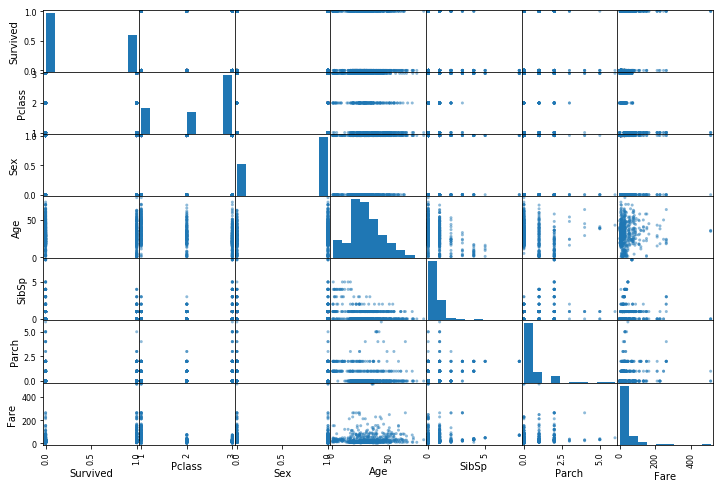

In [72]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# sns.pairplot(train)
scatter_matrix(train.iloc[:,1:], figsize=(12,8)) #passengerld 빼고

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [74]:
train['Survived'].sum()/len(train) # 38% 만이 생존 

0.3838383838383838

#### relationship with Age

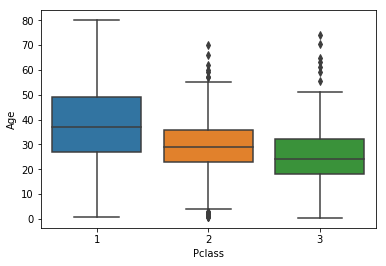

In [75]:
sns.boxplot(x='Pclass',y='Age',data=train)

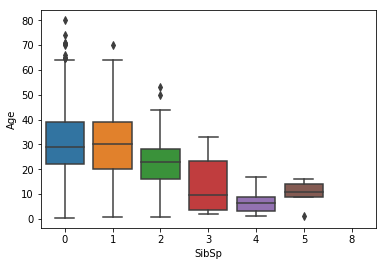

In [76]:
sns.boxplot(x='SibSp',y='Age',data=train)

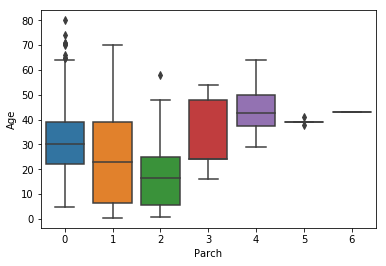

In [77]:
sns.boxplot(x='Parch',y='Age',data=train)

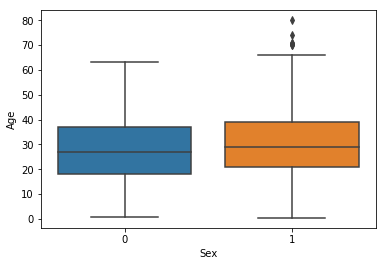

In [78]:
sns.boxplot(x='Sex',y='Age',data=train)

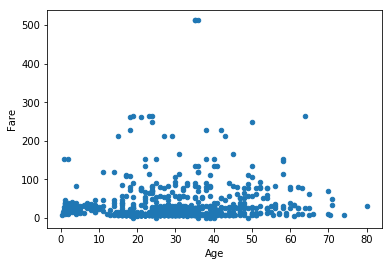

In [79]:
train.plot(kind='scatter',x='Age',y='Fare')

#### relationship with survived

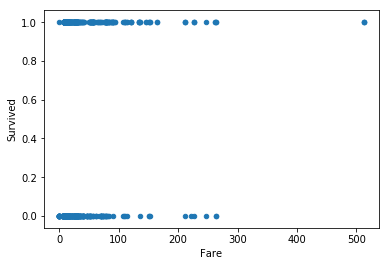

In [80]:
train.plot(kind='scatter',x='Fare',y='Survived')

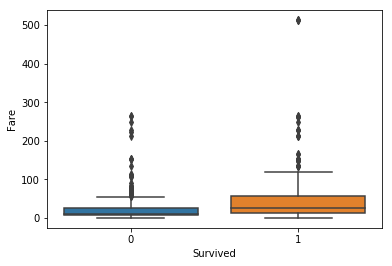

In [81]:
sns.boxplot(x='Survived',y='Fare',data=train)

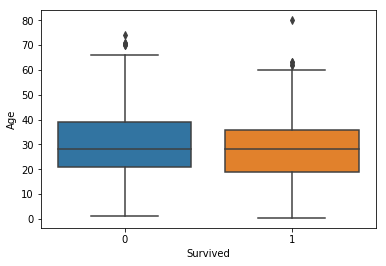

In [82]:
sns.boxplot(x='Survived',y='Age',data=train)

In [83]:
pd.crosstab(train['Survived'],train['Sex'])

Sex         0    1
Survived          
0          81  468
1         233  109

In [84]:
pd.crosstab(train['Survived'],train['Pclass'])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

#### replacing null-value

In [85]:
train[['Age']].describe()

Age
count  714.000000
mean    29.699118
std     14.526497
min      0.420000
25%     20.125000
50%     28.000000
75%     38.000000
max     80.000000

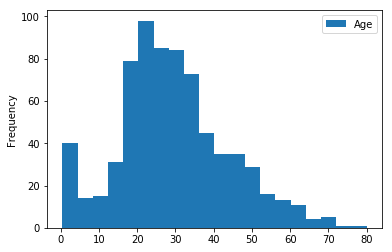

In [86]:
train.plot(kind='hist',y='Age',bins=20)

sklearn.preprocessing.imputer 로 해보기 

Age 결측치 처리

In [87]:
#from sklearn.preprocessing import Imputer

#imputer = Imputer(strategy='median')

#imputer.fit(train[['Age']])
#X = imputer.transform(train[['Age']])

In [88]:
#train[['Age']] = X
#train.isna().sum()

Embarked 결측치 처리

(array([  2.,   0.,   0., 168.,   0.,   0.,  77.,   0.,   0., 644.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

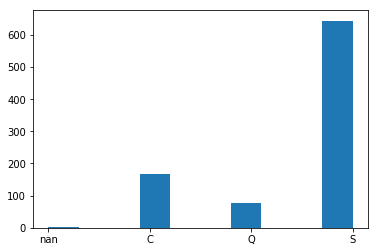

In [89]:
plt.hist(train[['Embarked']])

In [90]:
train.loc[train['Embarked'].isna(),'Embarked']='S'

(array([168.,   0.,   0.,   0.,   0.,  77.,   0.,   0.,   0., 646.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

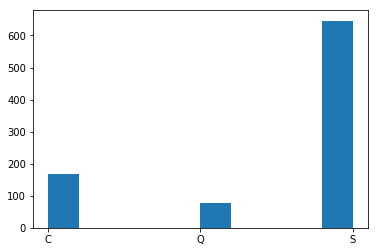

In [91]:
plt.hist(train[['Embarked']])

In [92]:
train =  embarked_encoding(train) # C = 0, Q = 1 , S = 2

In [93]:
train['Embarked'].unique()

array([2, 0, 1], dtype=int64)

knn - impute 

[298.11775085485135, 248.9308412646714, 215.6770056166319, 199.12931830130088, 193.09646881909234, 190.36832006200012, 183.33198517078662, 179.8235184385698, 176.93211082927607, 175.62744794372065, 174.73628737656657, 171.65747708871285, 168.82761905275672, 170.0035355041958, 168.2682331140063, 168.24664819408528, 166.9484148128022, 167.15755149563967, 167.01739781297823, 168.2203262688185, 166.93507854171767, 167.25693833066177, 167.25646695842246, 167.221817868044, 167.84917698369327, 167.37808331713987, 168.0003041268319, 167.68442326416337, 167.65451284871438, 167.46122446587768, 167.39136284434497, 167.76125823735055, 167.31032623808863, 167.53897165954928, 168.0247394336559, 168.6539348275149, 168.46856290041993, 168.73093931756765, 167.97379773035485, 167.86421560560447]

min error K = 21


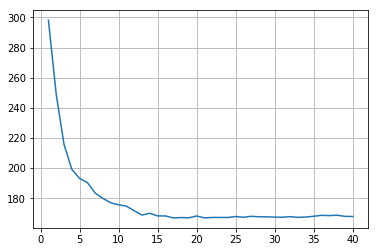

In [94]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

scores = []
columns = ['Pclass','SibSp']
train_X_age = train.loc[train['Age'].isna() != True,columns]
train_y_age = train.loc[train['Age'].isna() != True,'Age']
test_X_age = train.loc[train['Age'].isna(),columns]

for k in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_s = -cross_val_score(knn, train_X_age, train_y_age, cv=10, scoring='neg_mean_squared_error')
    scores.append(mse_s.mean())
    
print(scores)   

plt.plot(range(1,41), scores)
plt.grid()
print("\nmin error K = %d" % ( np.argmin(scores) +1 ) )  

In [95]:
knn = KNeighborsRegressor(n_neighbors = 21)
knn.fit(train_X_age, train_y_age)
knn_predict = knn.predict(test_X_age)

for i in range(0,len(knn_predict)):
    r =  round(knn_predict[i])
    knn_predict[i]=r 

In [96]:
knn_predict

array([30., 30., 30., 30., 30., 30., 40., 30., 30., 30., 30., 29., 30.,
       21., 39., 39., 29., 30., 30., 30., 30., 30., 30., 30., 29., 30.,
       30., 29., 30., 30., 30.,  8., 39., 39., 11.,  8., 30., 39., 29.,
       30., 30.,  8., 29., 30., 11., 30., 29., 29., 30., 39., 30., 30.,
       39., 30., 30., 39., 39., 39., 30., 21., 30., 30., 39.,  8., 21.,
       40., 30., 29., 39., 30., 30., 30., 29., 30., 30., 40., 30., 30.,
       11., 30., 30., 30., 30., 30., 30., 30., 29., 30., 29., 30., 40.,
       30., 30., 30., 30., 30., 39., 30., 11., 29., 30., 30., 30., 39.,
       30., 30., 30., 30., 39., 30., 30., 30., 30., 30., 39., 30., 30.,
       30., 30., 30., 29., 30., 30., 30., 30., 30., 30., 39., 30., 29.,
       30., 30., 39., 29., 30., 30., 30., 30., 30., 30., 40., 30., 30.,
       30., 30., 29., 39., 30., 30., 30., 30., 30., 39., 30., 39., 29.,
       30., 30., 30., 29., 30.,  8., 39., 39., 30., 30., 30., 30., 30.,
       39.,  8., 40., 30.,  8., 30., 30., 29.])

In [97]:
len(knn_predict)

177

In [98]:
knn_train = train.copy()
knn_train.loc[knn_train['Age'].isna(),'Age']=knn_predict

In [99]:
knn_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

LinearRegression impute 

In [100]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train_X_age, train_y_age)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
reg.score(train_X_age, train_y_age, sample_weight=None)

0.21701810250033748

In [102]:
reg_predict =  reg.predict(test_X_age)

for i in range(0,len(reg_predict)):
    r =  round(abs(reg_predict[i]))
    reg_predict[i]=r 

In [103]:
reg_predict

array([27., 33., 27., 27., 27., 27., 35., 27., 27., 27., 27., 23., 27.,
       18., 39., 39., 23., 27., 27., 27., 27., 27., 27., 27., 23., 27.,
       27., 23., 27., 27., 27.,  8., 39., 39., 14.,  8., 33., 39., 23.,
       27., 27.,  8., 23., 27., 14., 27., 23., 23., 27., 39., 27., 27.,
       39., 27., 33., 39., 39., 39., 27., 18., 33., 27., 39.,  8., 18.,
       35., 27., 23., 39., 27., 27., 27., 23., 27., 27., 35., 27., 27.,
       14., 27., 27., 33., 27., 27., 27., 27., 23., 27., 23., 27., 35.,
       27., 27., 33., 27., 27., 39., 33., 14., 23., 27., 27., 27., 39.,
       27., 27., 27., 27., 39., 27., 27., 27., 33., 27., 39., 27., 27.,
       27., 27., 27., 23., 27., 27., 27., 33., 27., 27., 39., 27., 23.,
       27., 27., 39., 23., 27., 27., 27., 27., 27., 27., 35., 33., 27.,
       27., 27., 23., 39., 27., 27., 33., 27., 27., 39., 27., 39., 23.,
       27., 27., 27., 23., 27.,  8., 39., 39., 27., 27., 27., 27., 27.,
       39.,  8., 35., 27.,  8., 27., 27., 23.])

In [104]:
reg_train = train.copy()
reg_train.loc[reg_train['Age'].isna(),'Age'] =reg_predict

test-preprocessing

In [105]:
def knnimpute (train, target) :
    columns = ['Pclass','SibSp']
    train_X_age = train.loc[train['Age'].isna() != True,columns]
    train_y_age = train.loc[train['Age'].isna() != True,'Age']
    test_X_age = train.loc[train['Age'].isna(),columns]

    knn = KNeighborsRegressor(n_neighbors = 21)
    knn.fit(train_X_age, train_y_age)
    knn_predict = knn.predict(test_X_age)

    for i in range(0,len(knn_predict)):
        r =  round(knn_predict[i])
        knn_predict[i]=r 
    train.loc[train['Age'].isna(),'Age']=knn_predict
    
def regimpute(train, target) :
    columns = ['Pclass','SibSp']
    train_X_age = train.loc[train['Age'].isna() != True,columns]
    train_y_age = train.loc[train['Age'].isna() != True,'Age']
    test_X_age = train.loc[train['Age'].isna(),columns]

    reg = LinearRegression()
    reg.fit(train_X_age, train_y_age)
    reg_predict = reg.predict(test_X_age)
    
    for i in range(0,len(reg_predict)):
        r =  round(reg_predict[i])
        reg_predict[i]=r 
    train.loc[train['Age'].isna(),'Age']=reg_predict
    

In [106]:
test = gender_encoding(test)
test = embarked_encoding(test)

In [107]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
test.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    2.265550    0.636364   30.272590    0.447368   
std     120.810458    0.841838    0.481622   14.181209    0.896760   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.250000    1.000000    0.000000   21.000000    0.000000   
50%    1100.500000    3.000000    1.000000   27.000000    0.000000   
75%    1204.750000    3.000000    1.000000   39.000000    1.000000   
max    1309.000000    3.000000    1.000000   76.000000    8.000000   

            Parch        Fare    Embarked  
count  418.000000  417.000000  418.000000  
mean     0.392344   35.627188    1.401914  
std      0.981429   55.907576    0.854496  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.500000    2.000000  
max      9.000000  512.329200    2.000000

In [109]:
fare_m = test[['Fare']].mean()
test[['Fare']] = test[['Fare']].fillna(value=fare_m)

In [110]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [111]:
knn_test = test.copy()
reg_test = test.copy()

knnimpute(knn_test,'Age')

regimpute(reg_test,'Age')

In [112]:
knn_test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         1  
1  47.0      1      0   363272   7.0000   NaN         2  
2  62.0      0      0   240276   9.6875   NaN         1  
3  27.0      0      0   315154   8.6625   NaN         2  
4  22.0      1      1  3101298  12.2875   NaN         2

In [113]:
reg_test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         1  
1  47.0      1      0   363272   7.0000   NaN         2  
2  62.0      0      0   240276   9.6875   NaN         1  
3  27.0      0      0   315154   8.6625   NaN         2  
4  22.0      1      1  3101298  12.2875   NaN         2

In [114]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
knn_test = knn_test.loc[:,columns]
reg_test = reg_test.loc[:,columns]

#### modeling

ranodm-forest, logistic-regression, decision-tree

##### knn

In [115]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
knn_train_X = knn_train.loc[:,columns]
knn_train_y = knn_train.loc[:,'Survived']

np.random.seed(1234)

shuffle_idx =  np.random.permutation(len(knn_train_X))
knn_train_X = knn_train_X.iloc[shuffle_idx,:] 
knn_train_y = knn_train_y.iloc[shuffle_idx]


##### reg

In [116]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
reg_train_X = reg_train.loc[:,columns]
reg_train_y = reg_train.loc[:,'Survived']

np.random.seed(1234)

shuffle_idx =  np.random.permutation(len(reg_train_X))
reg_train_X = reg_train_X.iloc[shuffle_idx,:] 
reg_train_y = reg_train_y.iloc[shuffle_idx]


In [117]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict

# random-forest
forest_clf =  RandomForestClassifier(random_state=42)
forest_clf.fit(knn_train_X, knn_train_y)
forest_pred =forest_clf.predict(knn_test)


# logistric-regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(knn_train_X,knn_train_y)

logistic_pred = log_reg.predict(knn_test)


from sklearn.tree import DecisionTreeClassifier

clf_tree =  DecisionTreeClassifier(max_leaf_nodes=6, random_state=11) #tree hyper-parameter 
clf_tree.fit(knn_train_X, knn_train_y)

tree_pred = clf_tree.predict(knn_test)  

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


decision-tree image

In [118]:
import os, sys
from sklearn.externals.six import StringIO
if os.name == 'nt':      # if windows
    import pydot         # conda install pydot   (Anaconda package list has it)
elif os.name == 'posix' :  # if Linux, Mac ...        
    import pydotplus     # Linux : pip install pydotplus & sudo apt-get install graphviz 

from IPython.display import Image
from sklearn import tree

def show_tree(decision_tree, feature_names=None, class_names=None):   
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, 
                    class_names=class_names, filled=True, rounded=True)
    
    if os.name == 'nt':      # if windows
        graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    elif os.name == 'posix' :  # if Linux, Mac ...        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    # for linux 

    return(graph) 

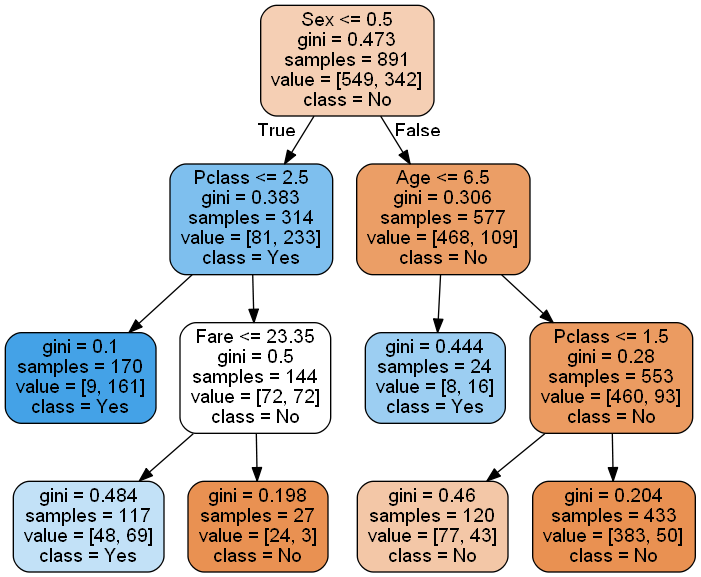

In [119]:
graph = show_tree(clf_tree, feature_names=list(knn_train_X), class_names=['No','Yes'])
Image(graph.create_png())

knn imputing accuracy

In [120]:
print('RandomForest accuracy : {0} %'.format((test_y.iloc[:,1] == forest_pred).mean()*100 ))
print('Logistic-Regression accuracy : {0} %'.format((test_y.iloc[:,1] == logistic_pred).mean()*100 ))
print('Decision-tree accuracy : {0} %'.format((test_y.iloc[:,1] == tree_pred).mean()*100 ))

RandomForest accuracy : 79.42583732057416 %
Logistic-Regression accuracy : 95.45454545454545 %
Decision-tree accuracy : 96.65071770334929 %


In [121]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict

# random-forest
forest_clf =  RandomForestClassifier(random_state=42)
forest_clf.fit(reg_train_X, reg_train_y)
forest_pred =forest_clf.predict(reg_test)


# logistric-regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(reg_train_X,reg_train_y)

logistic_pred = log_reg.predict(reg_test)


from sklearn.tree import DecisionTreeClassifier

clf_tree =  DecisionTreeClassifier(max_leaf_nodes=6, random_state=11) #tree hyper-parameter 
clf_tree.fit(reg_train_X, reg_train_y)

tree_pred = clf_tree.predict(reg_test)  

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [122]:
import os, sys
from sklearn.externals.six import StringIO
if os.name == 'nt':      # if windows
    import pydot         # conda install pydot   (Anaconda package list has it)
elif os.name == 'posix' :  # if Linux, Mac ...        
    import pydotplus     # Linux : pip install pydotplus & sudo apt-get install graphviz 

from IPython.display import Image
from sklearn import tree

def show_tree(decision_tree, feature_names=None, class_names=None):   
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, 
                    class_names=class_names, filled=True, rounded=True)
    
    if os.name == 'nt':      # if windows
        graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    elif os.name == 'posix' :  # if Linux, Mac ...        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    # for linux 

    return(graph) 

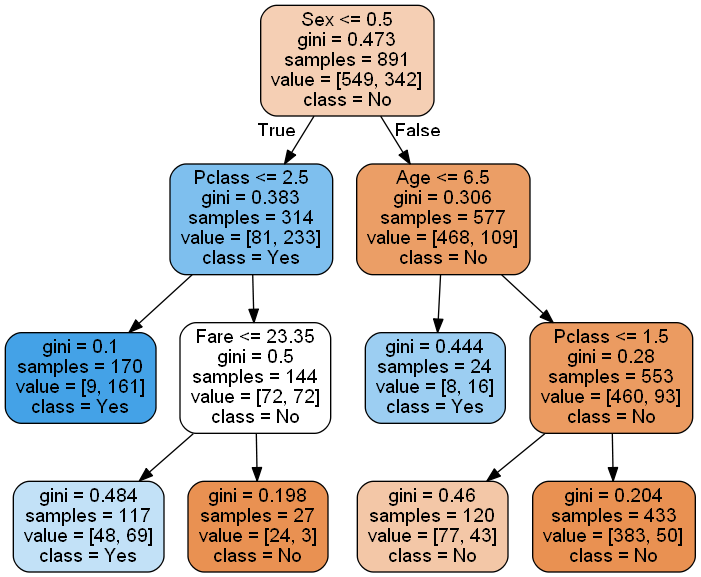

In [123]:
graph = show_tree(clf_tree, feature_names=list(knn_train_X), class_names=['No','Yes'])
Image(graph.create_png())

reg imputing accuracy

In [124]:
print('RandomForest accuracy : {0} %'.format((test_y.iloc[:,1] == forest_pred).mean()*100 ))
print('Logistic-Regression accuracy : {0} %'.format((test_y.iloc[:,1] == logistic_pred).mean()*100 ))
print('Decision-tree accuracy : {0} %'.format((test_y.iloc[:,1] == tree_pred).mean()*100 ))

RandomForest accuracy : 82.05741626794259 %
Logistic-Regression accuracy : 95.45454545454545 %
Decision-tree accuracy : 96.65071770334929 %
